Nama : Jonathan Jeremia Valentino Vici Sitohang<p>NIM : 09011181823007<p>Dataset : Video Games Sales Dataset (https://www.kaggle.com/sidtwr/videogames-sales-dataset)

### Visualisasi Data & Machine Learning (Linear Regression)

#### Masukkan library serta dataset yang akan digunakan

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ps4 = pd.read_csv("PS4_GamesSales.csv", encoding="windows-1250")
ps4.tail(5)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


#### Cek informasi apakah nilai memiliki dataype yang benar

In [3]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


Semuanya telah benar, tidak perlu melakukan converting

## Data preprocessing

#### Mengecek apabila dataset memiliki baris duplikat dan null. Apabila ada, hapus.

In [4]:
ps4.shape

(1034, 9)

In [5]:
ps4.count()

Game             1034
Year              825
Genre            1034
Publisher         825
North America    1034
Europe           1034
Japan            1034
Rest of World    1034
Global           1034
dtype: int64

In [6]:
print(ps4.duplicated().sum())

0


In [7]:
# Data tidak memiliki baris duplikat.
ps4 = ps4.drop_duplicates()
ps4.tail(5)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


In [8]:
# Mencari baris yang memiliki data null
print(ps4.isnull().sum())

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64


In [9]:
# Data memiliki nilai null. Hapus.
ps4 = ps4.dropna()
ps4.tail(5)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1025,Biomutant,2019.0,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017.0,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0


In [10]:
ps4.count()

Game             825
Year             825
Genre            825
Publisher        825
North America    825
Europe           825
Japan            825
Rest of World    825
Global           825
dtype: int64

## Data Visualization Analysis

Visualisasi Data (Total perilisan game per tahun)

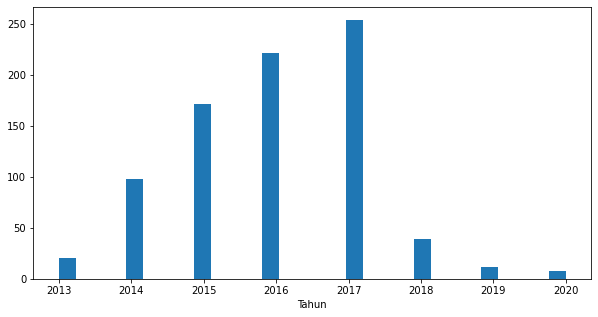

In [11]:
plt.subplots(figsize=(10,5))
plt.hist(ps4.Year, bins=30)
plt.xlabel('Tahun')
plt.show()

Visualisasi Data (Total Genre)

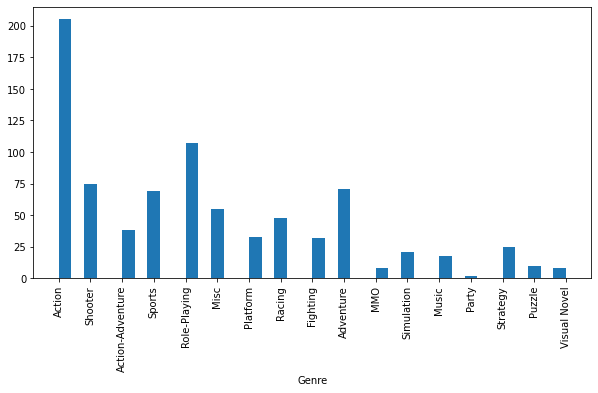

In [12]:
plt.subplots(figsize=(10,5))
plt.hist(ps4.Genre, bins=40)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.show()

Text(0, 0.5, 'Jumlah Game')

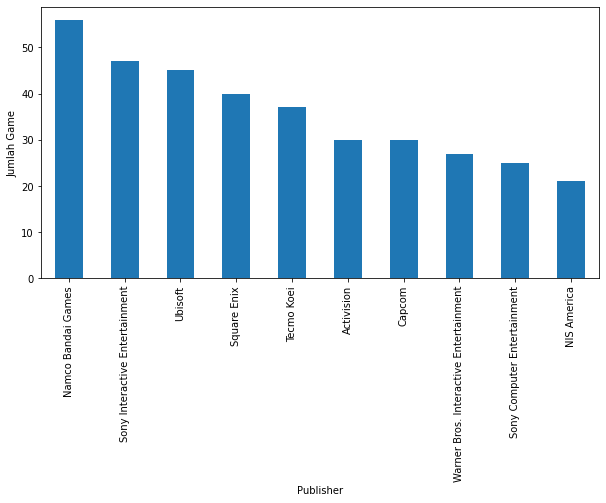

In [13]:
pub = ps4.Publisher.value_counts()[0:10]
pub.plot(kind='bar',figsize=(10,5))
plt.xlabel('Publisher')
plt.ylabel('Jumlah Game')

Untuk visualisasi berdasarkan publisher, saya akan mengambil beberapa publisher, yakni Namco Bandai Games dan Sony.

In [14]:
namco = ps4[ps4.Publisher == 'Namco Bandai Games']
sony = ps4[ps4.Publisher == 'Sony Interactive Entertainment']

In [15]:
namco.shape

(56, 9)

In [16]:
sony.shape

(47, 9)

Publisher Namco Bandai Games memiliki 56 Games, sedangkan Sony memiliki 47 Games.

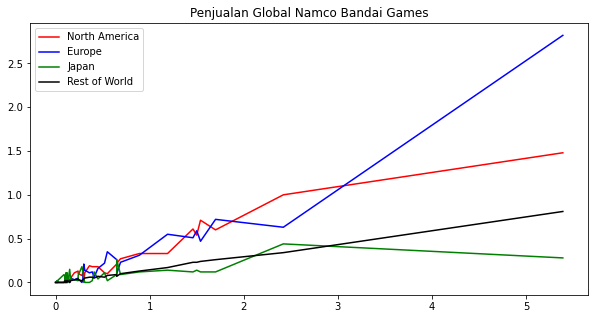

In [17]:
plt.subplots(figsize = (10,5))
plt.plot(namco.Global, namco['North America'], color = 'red', label = 'North America')
plt.plot(namco.Global, namco['Europe'], color = 'blue', label = 'Europe')
plt.plot(namco.Global, namco['Japan'], color = 'green', label = 'Japan')
plt.plot(namco.Global, namco['Rest of World'], color = 'black', label = 'Rest of World')
plt.legend()
plt.title('Penjualan Global Namco Bandai Games')
plt.show()

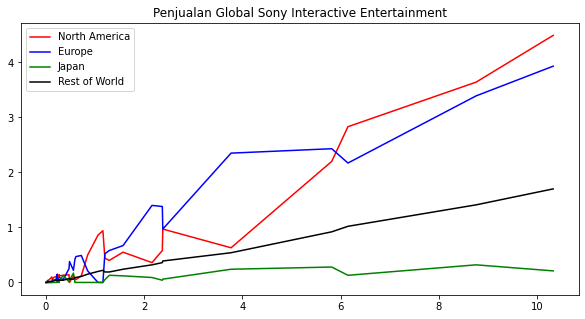

In [18]:
plt.subplots(figsize = (10,5))
plt.plot(sony.Global, sony['North America'], color = 'red', label = 'North America')
plt.plot(sony.Global, sony['Europe'], color = 'blue', label = 'Europe')
plt.plot(sony.Global, sony['Japan'], color = 'green', label = 'Japan')
plt.plot(sony.Global, sony['Rest of World'], color = 'black', label = 'Rest of World')
plt.legend()
plt.title('Penjualan Global Sony Interactive Entertainment')
plt.show()

Kesimpulan :
- Penjualan Game PS4 pada bagian North America (Region 1) serta Europe (Region 2) mendapatkan grafik yang cukup naik, bisa dibilang game pada kedua publisher ini memiliki banyak peminat di kedua region ini.
- Europe adalah region yang memiliki pembelian serta peminat terbanyak game pada publisher Bandai Namco ini, kemudian Publisher Sony memiliki peminat pada daerah North America, dengan grafik tidak jauh dengan Europe.
- Pada Jepang (Region 2 CERO), bisa dibilang game rilisan kedua publisher ini kurang diminati dan tidak sebanyak North America dan Europe serta Rest of World.
- Pada sisanya, yaitu Rest of World (Region 3 dan 4) memiliki nilai yang naik namun perlahan. Mengartikan bahwa game dari kedua publisher ini memiliki peminat namun naik secara perlahan.

## Machine Learning - Linear Regression

Metode yang digunakan adalah linear regresi. Digunakan untuk menguji hubungan antara variabel penyebab x terhadap variabel akibat y. Dalam hal ini :<p>
X = Global Sales<p>
Y = North America<p>
Disini dilakukan pendekatan sebagai berikut.

#### Libary yang dibutuhkan

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Cek data serta hapus kolom yang tidak dibutuhkan

In [20]:
ps4.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [21]:
ps4.drop(["Japan","Europe","Rest of World","Year","Genre","Publisher"],axis=1,inplace=True)
ps4.head()

,Game,North America,Global
0,Grand Theft Auto V,6.06,19.39
1,Call of Duty: Black Ops 3,6.18,15.09
2,Red Dead Redemption 2,5.26,13.94
3,Call of Duty: WWII,4.67,13.40
4,FIFA 18,1.27,11.80


#### Membuat variabel X dan Y

In [22]:
Y=ps4["North America"]
X=ps4
X.drop(["North America","Game"], axis=1, inplace=True)

<b>Memasukkan dataset ke dalam training set Linear Regression</b>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

<b>Output hasil akurasi, dan MSE</b>

In [24]:
regresi_linear = LinearRegression()

#Masukkan ke dalam regresi linear
regresi_linear.fit(X_train, y_train)

#Membuat nilai prediksi
prediksi = regresi_linear.predict(X_train)

#Scoring
print("Score Akurasi (Train) :", regresi_linear.score(X_train, y_train))
print("Score Akurasi (Test) :", regresi_linear.score(X_test, y_test))
print("MSE (Mean Square Errror) :", mean_squared_error(y_train,prediksi))
print("\nIntercept: \n", regresi_linear.intercept_)
print('Coefficients: \n', regresi_linear.coef_)

Score Akurasi (Train) : 0.8622714208826537
Score Akurasi (Test) : 0.9467039137497171
MSE (Mean Square Errror) : 0.0550565448334338

Intercept: 
 0.01939630723659619
Coefficients: 
 [0.3279016]


Visualisasi data menggunakan plot

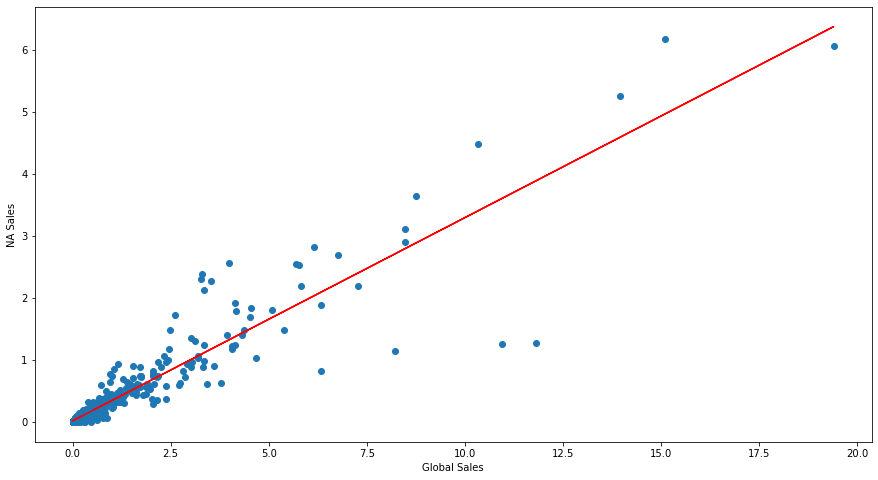

In [25]:
plt.subplots(figsize=(15,8))
plt.scatter(X_train, y_train)
plt.xlabel('Global Sales')
plt.ylabel('NA Sales')

#Prediksi
plt.plot(X_train, prediksi, color='r')

plt.show()